In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
# LaTex must be installed for this to work
# sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{bm}')

%matplotlib widget

In [45]:
def count_class_distributions(folder_path):
  char_count = {}

  for filename in os.listdir(folder_path):
      if filename.endswith('.txt'):
          with open(os.path.join(folder_path, filename)) as file:
              for line in file:
                  first_char = line.strip()[0]
                  char_count[first_char] = char_count.get(first_char, 0) + 1

  return char_count


def make_bar_plot(char_count, class_names, title):
  char_count = dict(sorted(char_count.items()))
  char_list = list(char_count.keys())
  count_list = list(char_count.values())


  # Define colors for the bars
  colors = ['coral', 'mediumorchid', '#e5ae38', '#6d904f', '#a89c9c']

  fig = plt.figure()
  # Create a bar plot
  bars = plt.bar(class_names, count_list, color=colors)
  plt.title(title, fontsize=18, fontweight='bold')
  # plt.xlabel('Class', fontsize=12)
  # plt.ylabel('Count', fontsize=12)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)

  # Add a legend for the colors and class labels
  handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(class_names))]
  labels = class_names
  # plt.legend(handles, labels, fontsize=15)

  for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
                 str(count_list[i]), color='white', ha='center', va='bottom', fontsize=18)

  plt.show()



{'1': 72357, '0': 113627}


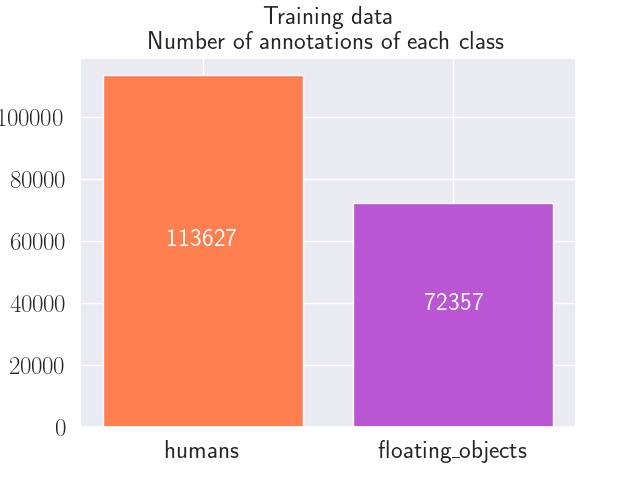

In [58]:
file_path = "/home/msccomputer/Desktop/yolo_full_dataset/train/labels"

char_count = count_class_distributions(file_path)
print(char_count)

class_names = ["humans", "floating_objects"]
title = 'Training data \n Number of annotations of each class'
make_bar_plot(char_count, class_names, title)

if input("Save fig?") == "y":
    plt.savefig("distribution_train_data.svg")

{'1': 21608, '0': 31298}


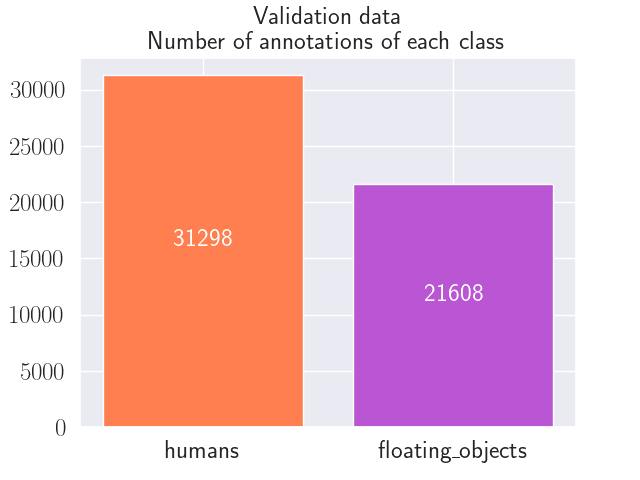

In [56]:
file_path = "/home/msccomputer/Desktop/yolo_full_dataset/val/labels"

char_count = count_class_distributions(file_path)
print(char_count)


class_names = ["humans", "floating_objects"]
title = 'Validation data \n Number of annotations of each class'
make_bar_plot(char_count, class_names, title)

if input("Save fig?") == "y":
    plt.savefig("distribution_val_data.svg")

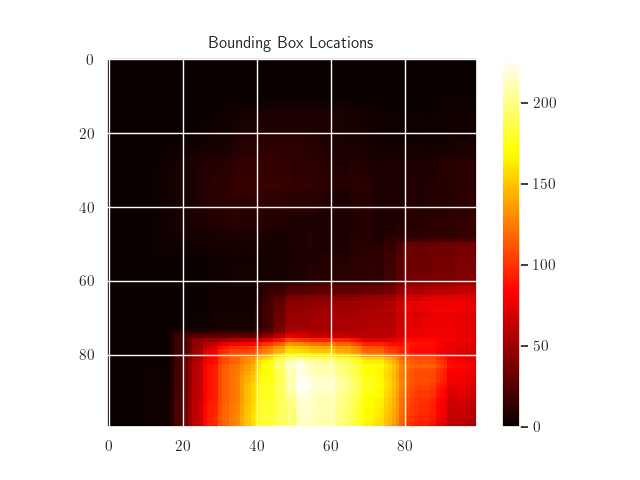

In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt

folder_path = '/home/msccomputer/Desktop/msc_dataset/val/labels'  # replace with the path to the folder containing the .txt files
heatmap_data = np.zeros((1080, 1920))  # create an empty 100x100 array to store the heatmap data

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        with open(os.path.join(folder_path, filename)) as file:
            for line in file:
                coords = line.strip().split()[1:5]  # extract the bounding box coordinates
                x, y, w, h = [float(coord) for coord in coords]
                x1, y1 = int(x*1920), int(y*1080)  # convert the coordinates to pixel values
                x2, y2 = int((x+w)*1920), int((y+h)*1080)
                heatmap_data[y1:y2, x1:x2] += 1  # increment the heatmap data in the bounding box region

# Create a heatmap plot
plt.figure() 
plt.imshow(heatmap_data, cmap='hot')
plt.title('Bounding Box Locations')
plt.colorbar()
plt.show()